# Espérance de vie

Importer les modules seaborn et matplotlib

In [13]:
import seaborn as sns
import matplotlib.pyplot as mat
import pandas as pd

Charger le jeu de données `healthexp` depuis seaborn

In [14]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


Déterminer quelles sont les variables discrètes et continues du jeu de données.

In [15]:
# 2. Analyse automatique
def classer_variables(df, seuil=20):
    discretes = []
    continues = []

    for col in df.columns:
        # Si c'est du texte (object) ou si le nombre de valeurs uniques est faible
        if df[col].dtype == 'object' or df[col].nunique() < seuil:
            discretes.append(f"{col} ({df[col].nunique()} valeurs uniques)")
        else:
            continues.append(f"{col} ({df[col].nunique()} valeurs uniques)")

    print("--- VARIABLES DISCRÈTES ---")
    for var in discretes:
        print(f"- {var}")
        
    print("\n--- VARIABLES CONTINUES ---")
    for var in continues:
        print(f"- {var}")

# 3. Lancer l'analyse
classer_variables(df)

--- VARIABLES DISCRÈTES ---
- Country (6 valeurs uniques)

--- VARIABLES CONTINUES ---
- Year (51 valeurs uniques)
- Spending_USD (274 valeurs uniques)
- Life_Expectancy (118 valeurs uniques)


Analyser la variable `Country`

In [16]:
df['Country'].value_counts()

Country
USA              51
Japan            51
Germany          50
Canada           44
Great Britain    43
France           35
Name: count, dtype: int64

Afficher la répartition des effectifs par catégorie dans une table avec la fonction `value_counts`

In [17]:
# Affiche une table avec colonnes "Country" et "count"
df['Country'].value_counts().reset_index()

,Country,count
0,USA,51
1,Japan,51
2,Germany,50
3,Canada,44
4,Great Britain,43
5,France,35


Essayer de trier le résultat en fonction de l'index avec la fonction `sort_index`.

In [19]:
# 1. Compte -> 2. Trie par nom (A-Z) -> 3. Convertit en table
df['Country'].value_counts().sort_index().reset_index()

,Country,count
0,Canada,44
1,France,35
2,Germany,50
3,Great Britain,43
4,Japan,51
5,USA,51


In [20]:
# 1. On compte
distribution = df['Country'].value_counts().reset_index()

# 2. On trie par la colonne 'count' en décroissant (du + grand au + petit)
distribution_triee = distribution.sort_values(by='count', ascending=False)

print(distribution_triee)

         Country  count
0            USA     51
1          Japan     51
2        Germany     50
3         Canada     44
4  Great Britain     43
5         France     35


Analyser la variable `Spending_USD`

In [21]:
df['Spending_USD'].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

Utiliser la fonction `describe`.

In [22]:
df['Spending_USD'].describe()

count      274.000000
mean      2789.338905
std       2194.939785
min        123.993000
25%       1038.357000
50%       2295.578000
75%       4055.610000
max      11859.179000
Name: Spending_USD, dtype: float64

Essayer de regrouper les statistiques en fonction de la variable `Country`.

In [23]:
df.groupby('Country')['Spending_USD'].describe()

,count,mean,std,min,25%,50%,75%,max
Country,,,,,,,,
Canada,44.0,2685.778341,1526.252453,313.391,1435.33825,2239.361,3998.28700,5828.324
France,35.0,3045.145057,1468.282187,192.143,1958.98000,3152.016,4230.56600,5468.418
Germany,50.0,2667.280200,1873.356162,252.311,1059.54450,2414.681,3904.04875,6938.983
Great Britain,43.0,2034.192465,1433.797586,123.993,713.88150,1683.905,3388.10800,5018.700
Japan,51.0,1860.257902,1467.225806,150.437,689.81700,1420.271,2744.55700,4665.641
USA,51.0,4388.570529,3386.309322,326.961,1390.80700,3586.745,7275.76950,11859.179


Afficher le graphique qui affiche ces statistiques pour la variable `Spending_USD`.

C:\Users\desmo\AppData\Local\Temp\ipykernel_20644\1305732465.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Spending_USD', palette='viridis')


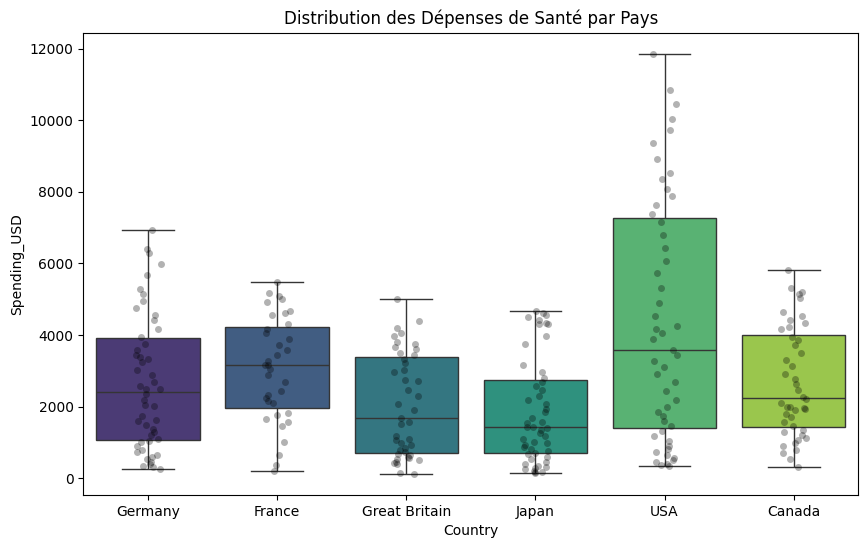

In [24]:
# 1. Création du Boxplot
mat.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Country', y='Spending_USD', palette='viridis')

# Optionnel : Ajouter les points réels par dessus pour voir la densité
sns.stripplot(data=df, x='Country', y='Spending_USD', color='black', alpha=0.3)

mat.title('Distribution des Dépenses de Santé par Pays')
mat.show()

Afficher le graphique qui permet de présenter la distribution des effectifs par intervalle.

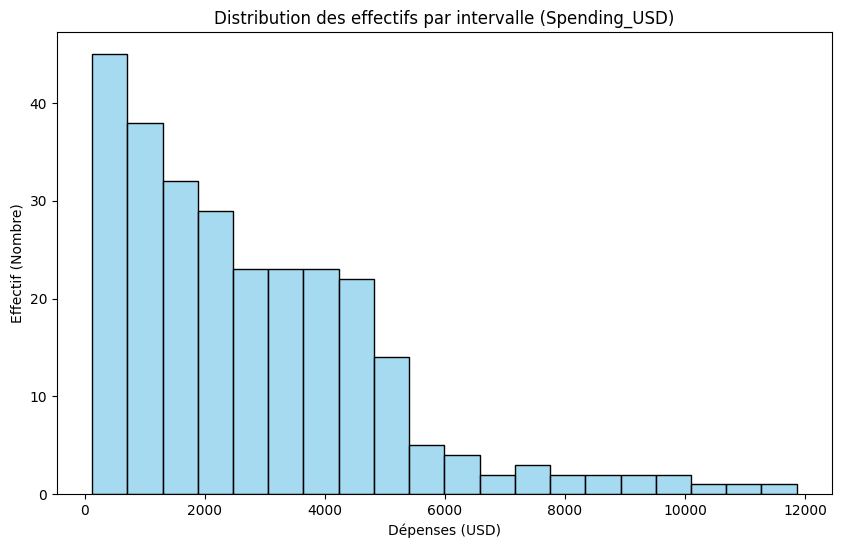

In [25]:
mat.figure(figsize=(10, 6))

# Le paramètre clé est 'bins' : c'est le nombre d'intervalles souhaités
sns.histplot(data=df, x='Spending_USD', bins=20, color='skyblue', edgecolor='black')

mat.title('Distribution des effectifs par intervalle (Spending_USD)')
mat.xlabel('Dépenses (USD)')
mat.ylabel('Effectif (Nombre)')
mat.show()

Regrouper les graphiques sur le même résultat avec la fonction `subplots`.

C:\Users\desmo\AppData\Local\Temp\ipykernel_20644\1693895092.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Country', y='Spending_USD', ax=axes[0], palette='viridis')


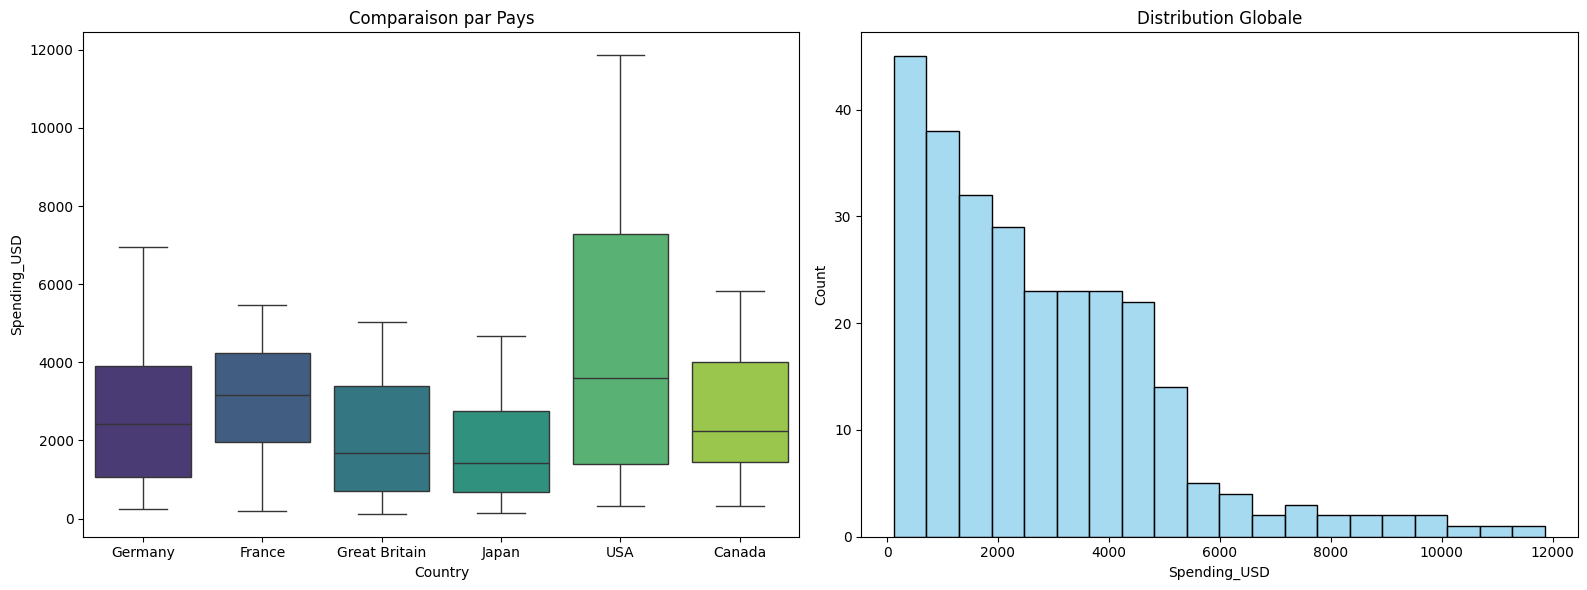

In [26]:
# 1. Création de la figure et des axes (1 ligne, 2 colonnes)
# fig = la fenêtre globale
# axes = une liste contenant les 2 emplacements [gauche, droite]
fig, axes = mat.subplots(1, 2, figsize=(16, 6))

# 2. Premier graphique : Boxplot -> on le met dans axes[0] (gauche)
sns.boxplot(data=df, x='Country', y='Spending_USD', ax=axes[0], palette='viridis')
axes[0].set_title('Comparaison par Pays')

# 3. Deuxième graphique : Histogramme -> on le met dans axes[1] (droite)
sns.histplot(data=df, x='Spending_USD', bins=20, ax=axes[1], color='skyblue')
axes[1].set_title('Distribution Globale')

# 4. Ajustement automatique des espaces
mat.tight_layout()
mat.show()

Choisir le graphique le plus adapté pour analyser les variables `Spending_USD` et `Life_Expectancy`.

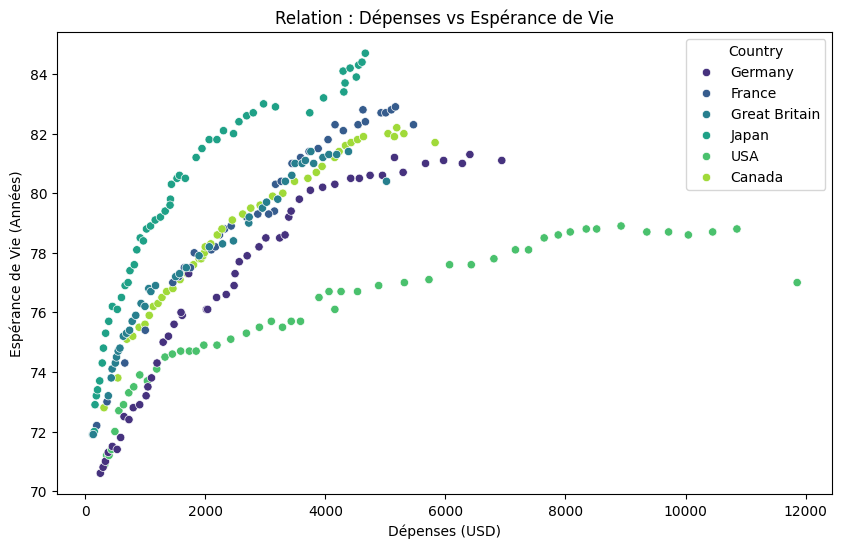

In [27]:
mat.figure(figsize=(10, 6))

# sns.scatterplot est la fonction dédiée aux nuages de points
# On ajoute souvent hue='Country' pour distinguer les tendances par pays
sns.scatterplot(data=df, x='Spending_USD', y='Life_Expectancy', hue='Country', palette='viridis')

mat.title('Relation : Dépenses vs Espérance de Vie')
mat.xlabel('Dépenses (USD)')
mat.ylabel('Espérance de Vie (Années)')
mat.show()

Ajouter la variable `Country` dans le graphique avec la représentation la plus adaptée.

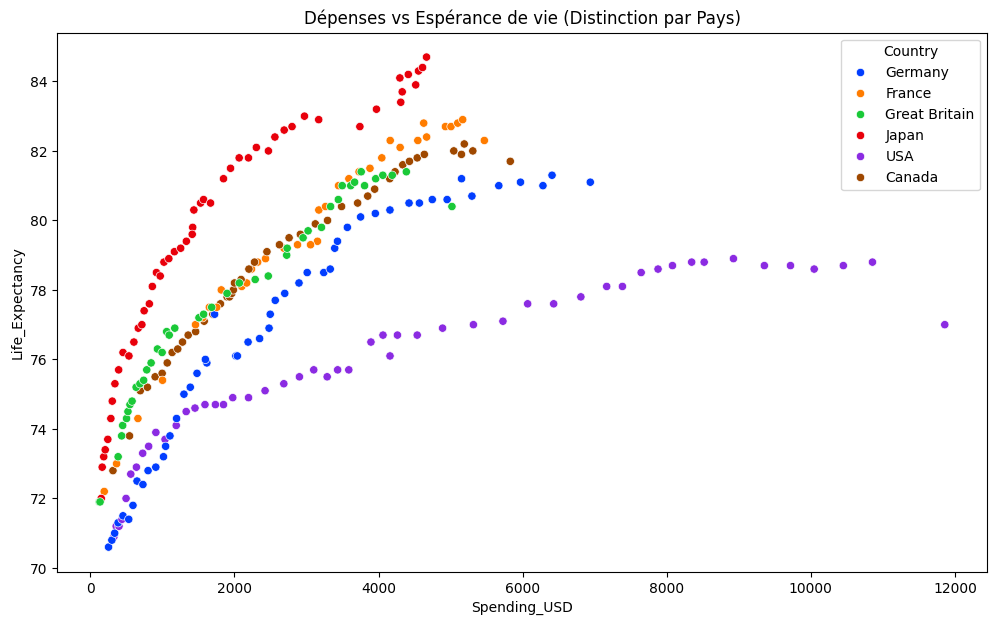

In [28]:
mat.figure(figsize=(12, 7))

# Le paramètre hue='Country' colorie chaque point selon son pays
sns.scatterplot(data=df, x='Spending_USD', y='Life_Expectancy', hue='Country', palette='bright')

mat.title('Dépenses vs Espérance de vie (Distinction par Pays)')
mat.show()

Quels premiers enseignements pouvez-vous en tirer ?

Je remarque qu'il y a une corélation entre l'espérence de vie et et les dépences. (que les riches vivent plus longtemps que les pauvres) dans tout les pays sauf les USA.
Et que USA se détachent complètement du groupe, dépense explosive et moins d'espérence de vie...  
LeJapon est le bon éleve, record d'espérence de vie pour des dépenses les plus faible.